In [31]:
import os
os.environ['USE_PYGEOS'] = '0'
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx 
from shapely.geometry import Point, LineString
from shapely import distance
import numpy as np
from pyproj import Transformer
from shapely.geometry import LineString
import shapely.ops as sp_ops
import warnings
warnings.filterwarnings("ignore")

In [32]:
path = os.getcwd()
parent = os.path.dirname(path)
main_folder_path =os.path.normpath(os.getcwd() + os.sep + os.pardir)
df = gpd.read_file(main_folder_path+"\data\gis\osm\\roads.shp")  

In [33]:
road_names = df[df["ref"].notnull()]["ref"].unique()
road_names_N = [road for road in road_names if road.startswith("N")]
# road_names_N1 = [road for road in road_names_N if "1" in road]

df_N = df[df["ref"].isin(road_names_N)]
df_N["ref"]=df_N["ref"].str.replace(" ","")
# df_N["ref"]=df_N["ref"].str.replace("H","")


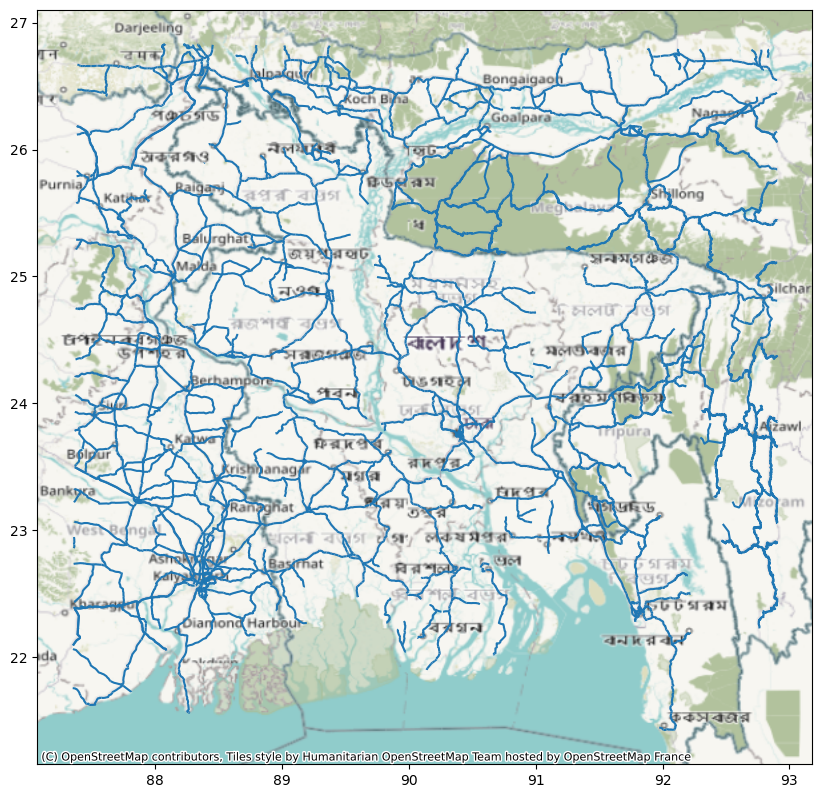

In [34]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
df_primary  =df[(df["type"]=="primary")|(df["type"]=="trunk")]
df_primary.plot(ax=ax)
cx.add_basemap(ax=ax,crs="epsg:4326")

In [35]:
from shapely import wkt

In [36]:
df_sections = pd.read_csv(main_folder_path + "\\data\\intersections.csv")#pd.read_csv(main_folder_path + "\\data\\intersections_BONUS.csv")
df_sections

,Unnamed: 0,road,chainage,lrp,lat,lon,gap,type,name,geometry,intersec_to
0,0,N1,81.801,LRP083a,23.478944,91.117722,NaN,intersection,Box culvert,POINT (91.1177216 23.4789438),N102
1,1,N1,143.795,LRP147,23.019360,91.369777,NaN,intersection,"Ctg 98 km,Feni 2 km",POINT (91.3697771 23.0193604),N104
2,2,N1,10.885,LRP011a,23.694361,90.537611,NaN,intersection,Box culvert,POINT (90.5376108 23.6943608),N105
3,3,N1,8.000,LRP008,23.702056,90.515722,NaN,intersection,Km post missing,POINT (90.5157222 23.7020556),N2
4,4,N1,0.000,LRPS,23.706028,90.443333,NaN,intersection,Start of Road after Jatrabari Flyover infront...,POINT (90.443333 23.7060278),N8
5,5,N2,0.000,LRPS,23.705917,90.521444,NaN,intersection,Road Start from N1 at Katchpur,POINT (90.5214438 23.7059167),N1
6,6,N2,85.098,LRP085b,24.049694,91.107639,NaN,intersection,Box culvert,POINT (91.1076389 24.0496941),N102
7,7,N2,10.196,LRP011,23.777472,90.561667,NaN,intersection,Km post broken,POINT (90.5616667 23.7774716),N105
8,8,N2,140.657,LRP141a,24.267138,91.470638,NaN,intersection,Box culvert,POINT (91.4706382 24.2671382),N204
9,9,N2,115.916,LRP117,24.146639,91.343055,NaN,intersection,Sylhet 115 km,POINT (91.3430552 24.1466386),N204


In [37]:
main_folder_path =os.path.normpath(os.getcwd() + os.sep + os.pardir)
df_sections = pd.read_csv(main_folder_path + "\\data\\intersections_BONUS.csv")#pd.read_csv(main_folder_path + "\\data\\intersections_BONUS.csv")
df_sections["geometry"]=df_sections["0"].apply(wkt.loads)
df_sections = gpd.GeoDataFrame(df_sections,geometry="geometry", crs="EPSG:4326").drop(columns="0")
# df_sections

In [38]:
from shapely import buffer
points = []
for point in df_sections["geometry"]:
    point = buffer(point,0.1)
    points.append(point)

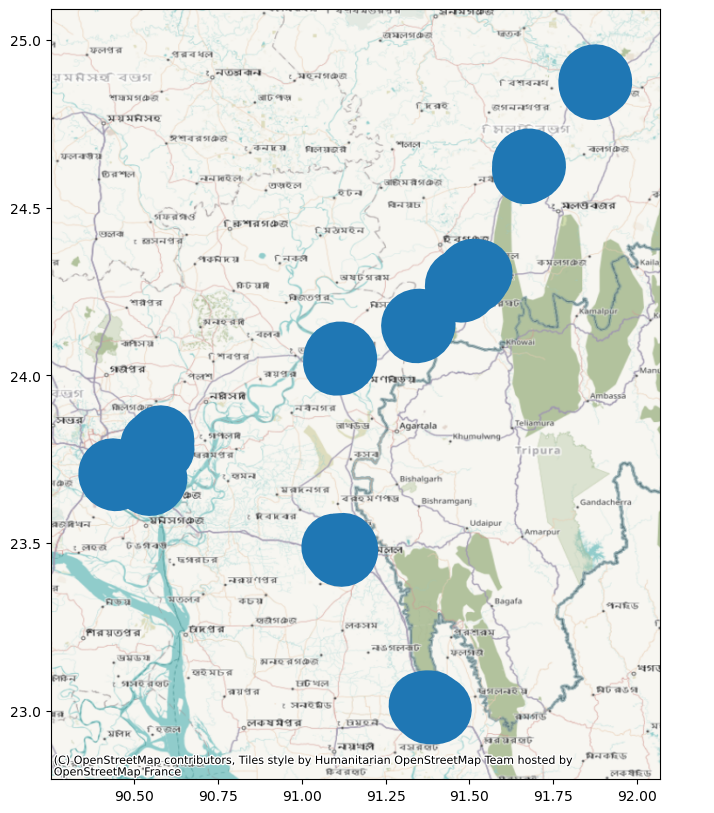

In [39]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
gpd.GeoSeries(points,crs="4326").plot(ax=ax)
cx.add_basemap(ax=ax,crs="EPSG:4326")

<AxesSubplot:>

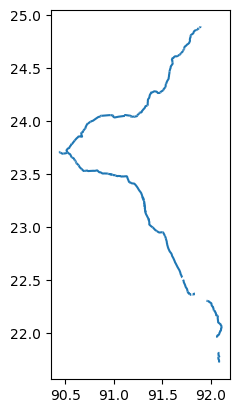

In [40]:
df_primary["ref"]=df_primary["ref"].str.replace(" ","")

df_N1N2=df_primary[(df_primary["ref"]=="N1")|(df_primary["ref"]=="N2")]
df_N1N2.plot()

In [41]:
df_normal_data = pd.read_csv(main_folder_path + "\\data\\_roads3.csv")

gdf_normal = gpd.GeoDataFrame(df_normal_data, geometry=gpd.points_from_xy(df_normal_data.lon, df_normal_data.lat), crs="EPSG:4326")
from shapely import buffer
lines = []
for name in ["N1","N2"]:
    gdf_temp = gdf_normal[gdf_normal["road"]==name]
    line = buffer(LineString(gdf_temp["geometry"]),0.1)
    lines.append(line)

In [42]:
cross_index_N1=[]
cross_index_N2=[]
for index in df_primary.index:
    if lines[0].intersects(df_primary.loc[index,"geometry"]):
        cross_index_N1.append(index)
    if lines[1].intersects(df_primary.loc[index,"geometry"]):
        cross_index_N2.append(index)


intersecting_N1 =df_primary[df_primary.index.isin(cross_index_N1)]
intersecting_N2 =df_primary[df_primary.index.isin(cross_index_N2)]
intersecting_N1N2=pd.concat([intersecting_N1,intersecting_N2])

intersecting_N1N2= intersecting_N1N2[~intersecting_N1N2["ref"].str.replace(" ","").isin(["N1","N2"])]


<AxesSubplot:>

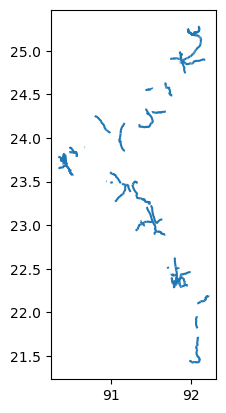

In [43]:
intersecting_N1N2.plot()

In [44]:
Intersect_points = []
for line_N1N2 in df_N1N2["geometry"]:
    for intersect_line in intersecting_N1N2["geometry"]:
        if line_N1N2!=intersect_line:
            if line_N1N2.intersects(intersect_line):
               Intersect_points.append(line_N1N2.intersection(intersect_line))
            
    

In [45]:
df_primary["ref"]=df_primary["ref"].str.replace(" ","")

df_N1N2=df_primary[(df_primary["ref"]=="N1")|(df_primary["ref"]=="N2")]

In [46]:

# df_used_intersects = pd.read_csv(main_folder_path+"\data\intersections.csv")
# gdf_used_intersects = gpd.GeoDataFrame(df_used_intersects, crs="EPSG:4326")

In [47]:
df_sections

,Unnamed: 0,geometry
0,N102,"POLYGON ((91.09869 23.48758, 91.10294 23.48784..."
1,N104,"POLYGON ((91.38751 23.01745, 91.39786 23.01003..."
2,N105,"POLYGON ((90.54338 23.70256, 90.54516 23.70148..."
3,N2,"POLYGON ((90.50979 23.71013, 90.51236 23.71221..."
4,N8,"POLYGON ((90.43931 23.69687, 90.43760 23.69783..."
5,N1,"POLYGON ((90.51222 23.70124, 90.51132 23.70285..."
6,N102,"POLYGON ((91.12389 24.04768, 91.12345 24.04648..."
7,N105,"POLYGON ((90.55977 23.79329, 90.56150 23.79415..."
8,N204,"MULTIPOLYGON (((91.48906 24.26885, 91.48899 24..."
9,N207,"MULTIPOLYGON (((91.68770 24.62269, 91.68625 24..."


In [48]:
shape_file_intersects = gpd.GeoSeries(Intersect_points,crs="4326")

<AxesSubplot:>

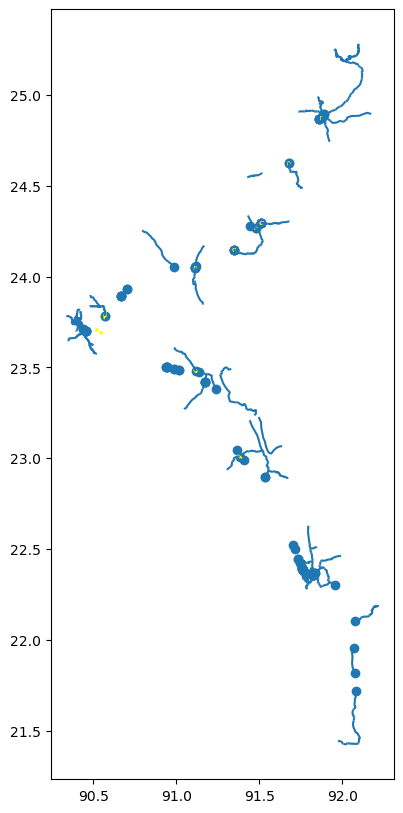

In [49]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
intersecting_N1N2.plot(ax=ax)

shape_file_intersects.plot(ax=ax)
df_sections.plot(ax=ax,color="yellow")

In [50]:
df_sections

,Unnamed: 0,geometry
0,N102,"POLYGON ((91.09869 23.48758, 91.10294 23.48784..."
1,N104,"POLYGON ((91.38751 23.01745, 91.39786 23.01003..."
2,N105,"POLYGON ((90.54338 23.70256, 90.54516 23.70148..."
3,N2,"POLYGON ((90.50979 23.71013, 90.51236 23.71221..."
4,N8,"POLYGON ((90.43931 23.69687, 90.43760 23.69783..."
5,N1,"POLYGON ((90.51222 23.70124, 90.51132 23.70285..."
6,N102,"POLYGON ((91.12389 24.04768, 91.12345 24.04648..."
7,N105,"POLYGON ((90.55977 23.79329, 90.56150 23.79415..."
8,N204,"MULTIPOLYGON (((91.48906 24.26885, 91.48899 24..."
9,N207,"MULTIPOLYGON (((91.68770 24.62269, 91.68625 24..."


In [51]:
from shapely.geometry import MultiPoint

In [52]:
something = MultiPoint([(0, 0), (1, 1), (2, 2)])
isinstance(something, MultiPoint)

True

In [53]:
 shape_file_intersects=shape_file_intersects[~shape_file_intersects.apply(lambda x: isinstance(x, MultiPoint))]

In [54]:
 # shape_file_intersects=shape_file_intersects[~shape_file_intersects.apply(lambda x: isinstance(x, MultiPoint))]

In [55]:

final_pair = []
for section in df_sections["geometry"]:
    min_dist = 10000
    for shape_file_intersect in shape_file_intersects.unique():
        
        # print(section,shape_file_intersect)
        if isinstance(shape_file_intersect, MultiPoint):
            for point in list(shape_file_intersect.geoms):
                dist = distance(section, point)
                if dist < min_dist:
                    min_dist = dist
                    closest_point_pair = (section,point)
                # print(LineString([point,section]))
        else:
            # print(LineString([shape_file_intersect,section]))
            dist = distance(section, shape_file_intersect)
            if dist < min_dist:
                min_dist = dist
                closest_point_pair = (section,shape_file_intersect)
    final_pair.append(closest_point_pair)

In [56]:
final_pair

[(<POLYGON ((91.099 23.488, 91.103 23.488, 91.105 23.488, 91.117 23.489, 91.11...>,
  <POINT (91.118 23.479)>),
 (<POLYGON ((91.388 23.017, 91.398 23.01, 91.405 23.005, 91.405 23.005, 91.407...>,
  <POINT (91.381 23.01)>),
 (<POLYGON ((90.543 23.703, 90.545 23.701, 90.546 23.701, 90.546 23.701, 90.54...>,
  <POINT (90.452 23.702)>),
 (<POLYGON ((90.51 23.71, 90.512 23.712, 90.513 23.713, 90.515 23.714, 90.517 ...>,
  <POINT (90.452 23.702)>),
 (<POLYGON ((90.439 23.697, 90.438 23.698, 90.436 23.699, 90.435 23.701, 90.43...>,
  <POINT (90.435 23.71)>),
 (<POLYGON ((90.512 23.701, 90.511 23.703, 90.508 23.709, 90.51 23.71, 90.512 ...>,
  <POINT (90.452 23.702)>),
 (<POLYGON ((91.124 24.048, 91.123 24.046, 91.122 24.045, 91.121 24.043, 91.12...>,
  <POINT (91.114 24.05)>),
 (<POLYGON ((90.56 23.793, 90.562 23.794, 90.563 23.795, 90.564 23.795, 90.565...>,
  <POINT (90.569 23.785)>),
 (<MULTIPOLYGON (((91.489 24.269, 91.489 24.269, 91.488 24.267, 91.488 24.267,...>,
  <POINT (91.477 24.268

In [57]:
for pair in final_pair:
    print(pair)

(<POLYGON ((91.099 23.488, 91.103 23.488, 91.105 23.488, 91.117 23.489, 91.11...>, <POINT (91.118 23.479)>)
(<POLYGON ((91.388 23.017, 91.398 23.01, 91.405 23.005, 91.405 23.005, 91.407...>, <POINT (91.381 23.01)>)
(<POLYGON ((90.543 23.703, 90.545 23.701, 90.546 23.701, 90.546 23.701, 90.54...>, <POINT (90.452 23.702)>)
(<POLYGON ((90.51 23.71, 90.512 23.712, 90.513 23.713, 90.515 23.714, 90.517 ...>, <POINT (90.452 23.702)>)
(<POLYGON ((90.439 23.697, 90.438 23.698, 90.436 23.699, 90.435 23.701, 90.43...>, <POINT (90.435 23.71)>)
(<POLYGON ((90.512 23.701, 90.511 23.703, 90.508 23.709, 90.51 23.71, 90.512 ...>, <POINT (90.452 23.702)>)
(<POLYGON ((91.124 24.048, 91.123 24.046, 91.122 24.045, 91.121 24.043, 91.12...>, <POINT (91.114 24.05)>)
(<POLYGON ((90.56 23.793, 90.562 23.794, 90.563 23.795, 90.564 23.795, 90.565...>, <POINT (90.569 23.785)>)
(<MULTIPOLYGON (((91.489 24.269, 91.489 24.269, 91.488 24.267, 91.488 24.267,...>, <POINT (91.477 24.268)>)
(<MULTIPOLYGON (((91.688 24.623

In [58]:
import matplotlib.lines as mlines


# etc etc, nine])

In [59]:

transformer = Transformer.from_crs('EPSG:4326', 'EPSG:3857', always_xy=True)

TypeError: 'Polygon' object is not iterable

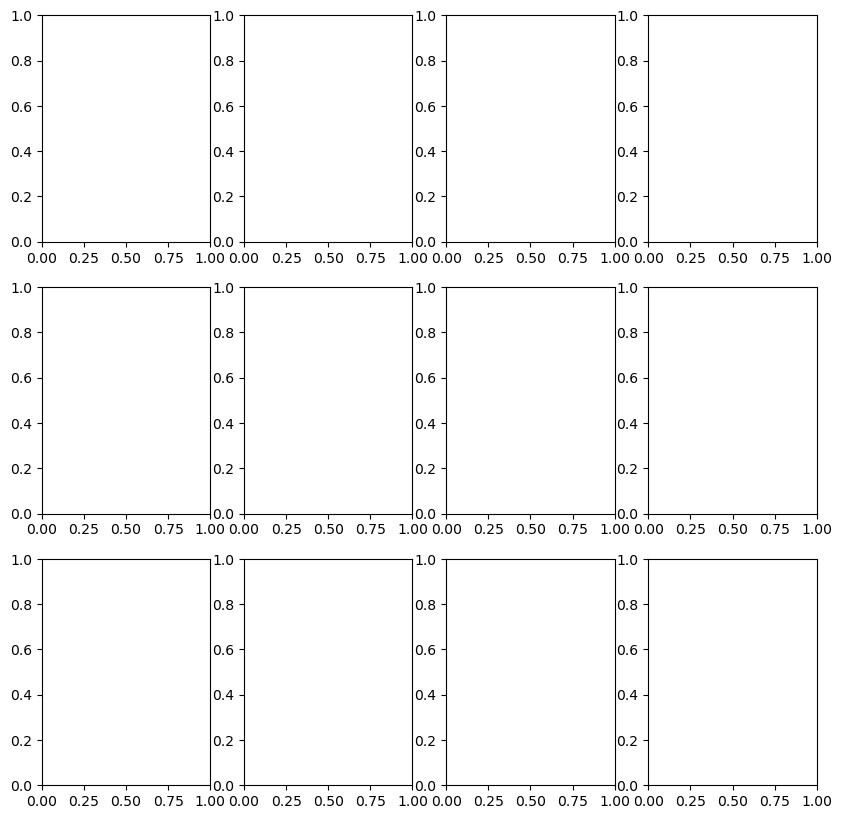

In [60]:
fig,ax=plt.subplots(3,4,figsize=(10,10))
ax =ax.flatten()
ax_count =0
dict_length = {}
orginal = mlines.Line2D([], [], color='red', marker='s', ls='', label='Csv data')
shapefile = mlines.Line2D([], [], color='blue', marker='D', ls='', label='Shapefile data')

for index, pair in enumerate(final_pair):
    line = LineString([pair[0],pair[1]])
    line_length= sp_ops.transform(transformer.transform ,line).length
    print(line_length)
    gpd.GeoSeries(pair[0],crs="EPSG:4326").plot(ax=ax[index],color="red")
    gpd.GeoSeries(pair[1],crs="EPSG:4326").plot(ax=ax[index],color="blue")
    gpd.GeoSeries(line,crs   ="EPSG:4326").plot(ax=ax[index],color="white")
    gpd.GeoSeries(buffer(line.centroid,0.03),crs   ="EPSG:4326").plot(ax=ax[index],color="pink",alpha=0)
    cx.add_basemap(ax=ax[index],crs="EPSG:4326",attribution_size=0) 
    if index == 8:
        ax[index].legend(handles=[orginal, shapefile],loc="lower center",bbox_to_anchor=(0.0, -0.4, 0.0, 0.0))
    ax[index].title.set_text((df_sections["Unnamed: 0"][0],f"{int(line_length)} m"))
    ax_count =ax_count+1
    dict_length[df_sections["Unnamed: 0"][index]]=line_length/1000
plt.show() 
    

In [ ]:
dict_length

In [ ]:
plt.bar(dict_length.keys(), dict_length.values(),color="red")
plt.xlabel("Road to which the N1 or N2 connects")
plt.ylabel("Difference in kilometers")
plt.title("Difference intersections shapefile and csv", fontsize = 14)

In [ ]:
df_length  = pd.DataFrame.from_dict(dict_length,orient=dict_length.keys())

In [ ]:
shape_file_intersects

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
# gpd.GeoSeries(lines,crs="4326").plot(ax=ax,alpha=0.3)
intersecting_N1.plot(ax=ax,color="red")
intersecting_N2.plot(ax=ax,color="yellow")
df_N1N2.plot(ax=ax,color="white")
gpd.GeoSeries(Intersect_points,crs="4326").plot(ax=ax)
cx.add_basemap(ax=ax,crs="EPSG:4326")

In [ ]:
df_trunk = df_N[((df_N["ref"]=="N1")|(df_N["ref"]=="N2"))]#(df_N["type"]=="trunk")&

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,15))
df_trunk.plot(ax=ax)
cx.add_basemap(crs=4326,ax=ax)
plt.show()

In [ ]:
# main_folder_path =os.path.normpath(os.getcwd() + os.sep + os.pardir)
# df_normal_data = pd.read_csv(main_folder_path + "\\data\\_roads3.csv")
# 
# gdf_normal = gpd.GeoDataFrame(df_normal_data, geometry=gpd.points_from_xy(df_normal_data.lon, df_normal_data.lat), crs="EPSG:4326")
# 
# from shapely import buffer
# lines = []
# for name in ["N1","N2"]:
#     gdf_temp = gdf_normal[gdf_normal["road"]==name]
#     line = buffer(LineString(gdf_temp["geometry"]),0.1)
#     lines.append(line)